## Guruji Astro Analysis for june-july 2024 : 

> All the observations during the analysis are provided in comments , yellow color font markdown.

>  Some graphs are intuitively explained 

> All the recommendations are provided in the end

> colab link for this notebook : https://drive.google.com/file/d/1ajyspG5ZHpMSWG_uOXonEWJpZzHmB1VA/view?usp=sharing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### <font color="cyan"> There are three csv files , let's go one by one and pre-process the data and perform analysis

<font color="yellow">  I belive the first link [ june-july 2024 ] in the pdf contains data related to logs of guruji astro for each user interction with the platform in the month of june-july 2024

The second link [ recharges for assignment ] contains recharges or transactions made by users for guruji astro 

Where as the third link [ usersdata for assignment ] contains the data of all the users of guruji astro platform and their interaction with the platform.


## <font color="yellow"> "rechargesfor assignment"  dataset  analysis :

In [2]:
# Read the recharge CSV file
df = pd.read_csv('rechargesfor assignment - rechargesfor assignment.csv')

# Display the first few rows
df.head()

,_id,Uid,Order Id,Status,Amount,Gst,UTC Time,gurujiUser,Gateway,Mode,totalAmount,ISTDate
0,665a173b9efc2e9fa90ab8c3,209937,order_OHCTwUL5S4z9kY,captured,100.0,18.0,2024-05-31T18:30:19.083Z,False,Razorpay,app,118.0,2024-06-01T00:00:19.083Z
1,665a179c9efc2e9fa90af52a,119321,order_OHCVex44YhZDba,captured,100.0,18.0,2024-05-31T18:31:56.624Z,True,Razorpay,ios,118.0,2024-06-01T00:01:56.624Z
2,665a18099efc2e9fa90b46b6,119321,order_OHCXZM6fCvpYVu,captured,920.0,144.0,2024-05-31T18:33:45.091Z,True,Razorpay,ios,1064.0,2024-06-01T00:03:45.091Z
3,665a1a1d9efc2e9fa90cd84c,212656,order_OHCgwQVPGVdZfj,captured,200.0,36.0,2024-05-31T18:42:37.431Z,False,Razorpay,app,236.0,2024-06-01T00:12:37.431Z
4,665a1c599efc2e9fa90e4592,209937,order_OHCr0nTyLd2re5,captured,100.0,18.0,2024-05-31T18:52:09.436Z,False,Razorpay,app,118.0,2024-06-01T00:22:09.436Z


### <font color="yellow"> Assumptions about what the features represent : 

>id could represent unique transaction id for each user

>uid could represent unique user id

>orderid represent the order id of the transaction

>amount represent the amount of the transaction

>date represent the date of the transaction

>status represent the status of the transaction

>gst tells us the  gst amount per transaction

>utc time & ist time represent the time and date of the transaction

>gurujiuser represent whether the transaction is made by already existing guruji user or not

>mode represent the mode of interaction with the platform

>totalamount represent inclusive of all the fees and taxes

>gateway represent the payment gateway used for the transaction

In [3]:
# column names
df.columns

Index(['_id', 'Uid', 'Order Id', 'Status', 'Amount', 'Gst', 'UTC Time',
       'gurujiUser', 'Gateway', 'Mode', 'totalAmount', 'ISTDate'],
      dtype='object')

In [4]:
# shape 
df.shape

(13515, 12)

<font color="yellow"> There are 13515 rows and 12 columns in "rechargesfor assignment" dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          13515 non-null  object 
 1   Uid          13515 non-null  int64  
 2   Order Id     13515 non-null  object 
 3   Status       13515 non-null  object 
 4   Amount       12565 non-null  float64
 5   Gst          13515 non-null  float64
 6   UTC Time     13515 non-null  object 
 7   gurujiUser   12900 non-null  object 
 8   Gateway      12900 non-null  object 
 9   Mode         13353 non-null  object 
 10  totalAmount  12301 non-null  float64
 11  ISTDate      13515 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


### <font color="yellow"> Based on the above  we can understand that this data is about transactions or payments made by users for guruji astro platform

In [6]:
# check for null values
df.isnull().sum()

_id               0
Uid               0
Order Id          0
Status            0
Amount          950
Gst               0
UTC Time          0
gurujiUser      615
Gateway         615
Mode            162
totalAmount    1214
ISTDate           0
dtype: int64

> <font color="yellow"> we could see that there are null values in the dataset

In [7]:
df = df.rename(columns={'_id': 'id'})
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'uid', 'order id', 'status', 'amount', 'gst', 'utc time',
       'gurujiuser', 'gateway', 'mode', 'totalamount', 'istdate'],
      dtype='object')

In [8]:
# check for duplicates
df.duplicated().sum()

0

> <font color="yellow"> No duplicate rows are present in curent version of the data

In [9]:
df.shape

(13515, 12)

In [10]:
df["id"].nunique()  

13512

In [11]:
df["uid"].nunique()

4509

In [12]:
df.head()

,id,uid,order id,status,amount,gst,utc time,gurujiuser,gateway,mode,totalamount,istdate
0,665a173b9efc2e9fa90ab8c3,209937,order_OHCTwUL5S4z9kY,captured,100.0,18.0,2024-05-31T18:30:19.083Z,False,Razorpay,app,118.0,2024-06-01T00:00:19.083Z
1,665a179c9efc2e9fa90af52a,119321,order_OHCVex44YhZDba,captured,100.0,18.0,2024-05-31T18:31:56.624Z,True,Razorpay,ios,118.0,2024-06-01T00:01:56.624Z
2,665a18099efc2e9fa90b46b6,119321,order_OHCXZM6fCvpYVu,captured,920.0,144.0,2024-05-31T18:33:45.091Z,True,Razorpay,ios,1064.0,2024-06-01T00:03:45.091Z
3,665a1a1d9efc2e9fa90cd84c,212656,order_OHCgwQVPGVdZfj,captured,200.0,36.0,2024-05-31T18:42:37.431Z,False,Razorpay,app,236.0,2024-06-01T00:12:37.431Z
4,665a1c599efc2e9fa90e4592,209937,order_OHCr0nTyLd2re5,captured,100.0,18.0,2024-05-31T18:52:09.436Z,False,Razorpay,app,118.0,2024-06-01T00:22:09.436Z


In [13]:
#  total amount
df["amount"].sum()

3748752.0

In [14]:
# total gst
df["gst"].sum()

656880.84

In [15]:
# get the dtypes
df.dtypes

id              object
uid              int64
order id        object
status          object
amount         float64
gst            float64
utc time        object
gurujiuser      object
gateway         object
mode            object
totalamount    float64
istdate         object
dtype: object

In [16]:
# utc time , istdate to datetime
df["utc time"] = pd.to_datetime(df["utc time"])
df["istdate"] = pd.to_datetime(df["istdate"])


In [17]:
# status value counts
df["status"].value_counts()

captured    13515
Name: status, dtype: int64

>### <font color="yellow"> Null value treatment :

In [18]:
# includes null values in value counts
df["gurujiuser"].value_counts(dropna=False)

True     6658
False    6242
NaN       615
Name: gurujiuser, dtype: int64

In [19]:
df.isnull().sum()

id                0
uid               0
order id          0
status            0
amount          950
gst               0
utc time          0
gurujiuser      615
gateway         615
mode            162
totalamount    1214
istdate           0
dtype: int64

>#### <font color="yellow"> We could see that where there gurujiuser is null , gateway is also null : 

This could be data entry mistake or a new category of users , for now we fill them with "unknown" or "data_not_available"
since it is a catogory feature 

We can't perform a group by with respect to any other columns as total unique values are less and fill the NaN values under these
columns with Mode.

In [20]:
# all the rows that has gurujiuser  as null where gateway is null
df[df["gurujiuser"].isnull() & df["gateway"].isnull()]


,id,uid,order id,status,amount,gst,utc time,gurujiuser,gateway,mode,totalamount,istdate
472,665d969b82e488c5ed6102dc,215078,order_OIFZQPxEmnG54y,captured,NaN,18.0,2024-06-03 10:10:35.455000+00:00,NaN,NaN,app,118.0,2024-06-03 15:40:35.455000+00:00
473,665d96a982e488c5ed61048a,3701,order_OIFZg9g4WpxaXr,captured,NaN,36.0,2024-06-03 10:10:49.873000+00:00,NaN,NaN,ios,266.0,2024-06-03 15:40:49.873000+00:00
474,665d981982e488c5ed61f671,110483,order_OIFg93xId1zhJz,captured,NaN,36.0,2024-06-03 10:16:57.160000+00:00,NaN,NaN,app,266.0,2024-06-03 15:46:57.160000+00:00
475,665d991b5e534c8a59d5740c,116586,order_OIFkgdqYY8Z9j0,captured,NaN,36.0,2024-06-03 10:21:15.128000+00:00,NaN,NaN,ios,266.0,2024-06-03 15:51:15.128000+00:00
476,665d9a2082e488c5ed636066,203984,order_OIFpHU2G16kqkj,captured,NaN,180.0,2024-06-03 10:25:36.074000+00:00,NaN,NaN,app,1180.0,2024-06-03 15:55:36.074000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1082,6661d669940da60067718073,95453,order_OJWeBDAe71xv1D,captured,125.0,18.0,2024-06-06 15:31:53.084000+00:00,NaN,NaN,app,143.0,2024-06-06 21:01:53.084000+00:00
1083,6661d6c0940da6006771d0bd,112086,order_OJWfiZlkQYIpTB,captured,1200.0,180.0,2024-06-06 15:33:20.443000+00:00,NaN,NaN,app,1380.0,2024-06-06 21:03:20.443000+00:00
1084,6661d704940da6006771fad7,97637,order_OJWguaZcxB7aB9,captured,250.0,36.0,2024-06-06 15:34:28.250000+00:00,NaN,NaN,app,286.0,2024-06-06 21:04:28.250000+00:00
1085,6661d716940da6006771fb98,96275,order_OJWhEoTZuAgfYx,captured,200.0,36.0,2024-06-06 15:34:46.780000+00:00,NaN,NaN,ios,236.0,2024-06-06 21:04:46.780000+00:00


In [21]:
df["gateway"].value_counts(dropna=False)

Razorpay    12900
NaN           615
Name: gateway, dtype: int64

In [22]:
# fill na of gurujiuser with unknown , gateway with other and mode with other 

df["mode"].fillna("other", inplace=True)

df["gateway"].fillna("other", inplace=True)

df["gurujiuser"].fillna("unknown", inplace=True)

><font color="yellow"> NaN values in mode of interaction could be users who are interaction via call or feature phones or any other means

In [23]:
# mode value counts with NaN
df["mode"].value_counts(dropna=False)

app      10959
ios       2246
other      162
web        148
Name: mode, dtype: int64

>#### <font color="yellow"> Observation : we know that totalamount  =  amount + gst  


Let's fill the NaN values in amount feature with totalamount - gst 

and viceversa

In [24]:
# Let's fill the NaN values in amouunt with totalamount - gst 
df["amount"].fillna(df["totalamount"] - df["gst"], inplace=True)

In [25]:
# Let's fill the NaN values in totalamount with amount + gst 
df["totalamount"].fillna(df["amount"] + df["gst"], inplace=True)


> <font color="yellow"> NaN value treatement is done :

In [26]:
df.isnull().sum()

id             0
uid            0
order id       0
status         0
amount         0
gst            0
utc time       0
gurujiuser     0
gateway        0
mode           0
totalamount    0
istdate        0
dtype: int64

> ### <font color="yellow"> Uni-variate analysis :

> <font color="yellow"> Total amount contributed by the users to the platform :  <font color="white"> 4002925.0

> <font color="yellow"> Total GST paid by the users :  <font color="white"> 656880.84

> <font color="yellow"> Total amount including GST :  <font color="white"> 4661714.84

> <font color="yellow"> Average , median and Max amount contributed by the users to the platform :  <font color="white"> 296.183870	 ,   200.000000  &  5000.000000	


In [27]:
# sum
df["amount"].sum()
df["gst"].sum()
df["totalamount"].sum()

4659805.84

In [28]:
df.describe()

,uid,amount,gst,totalamount
count,1.351500e+04,13515.000000,13515.000000,13515.000000
mean,1.605958e+05,296.183870,48.603836,344.787706
std,2.558993e+06,377.072628,60.699296,437.362448
min,1.900000e+01,1.000000,0.000000,1.180000
25%,3.301700e+04,50.000000,9.000000,59.000000
50%,1.120860e+05,200.000000,36.000000,236.000000
75%,2.270500e+05,250.000000,36.000000,286.000000
max,2.103522e+08,5000.000000,900.000000,5900.000000


In [29]:
# cat columns
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
cat_cols    

['id', 'order id', 'status', 'gurujiuser', 'gateway', 'mode']

<AxesSubplot: xlabel='mode', ylabel='count'>

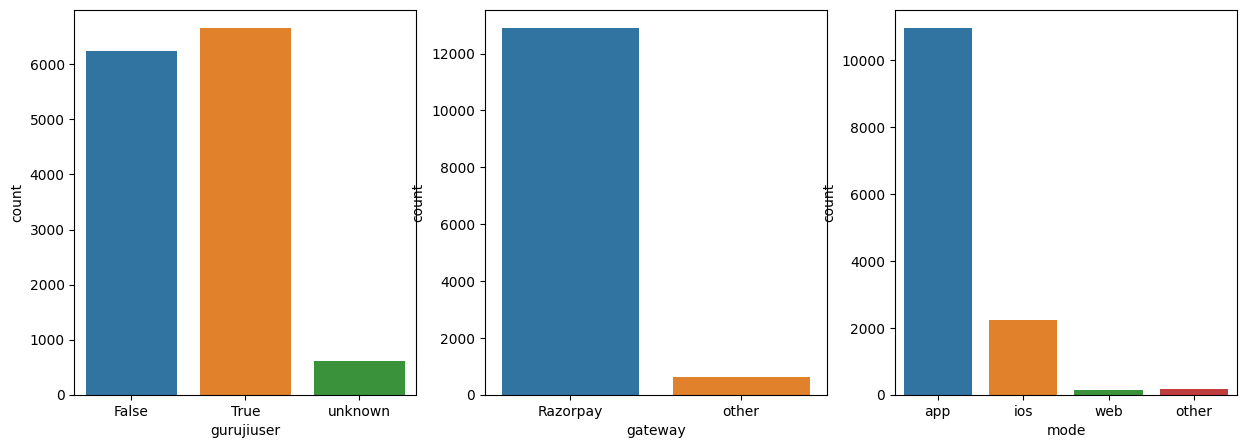

In [30]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x="gurujiuser", data=df, ax=ax[0])
sns.countplot(x="gateway", data=df, ax=ax[1])
sns.countplot(x="mode", data=df, ax=ax[2])


> ### <font color="yellow"> Observation : 

Exisitng Guruji users and new users contribution is almost equal 

Razorpay is the most trusted payment gateway by guruji astro 

Android is the most popular mode of interaction with the platform


C:\Users\mahik\AppData\Local\Temp\ipykernel_10584\556237417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["amount"], ax=ax[0])


<AxesSubplot: xlabel='amount'>

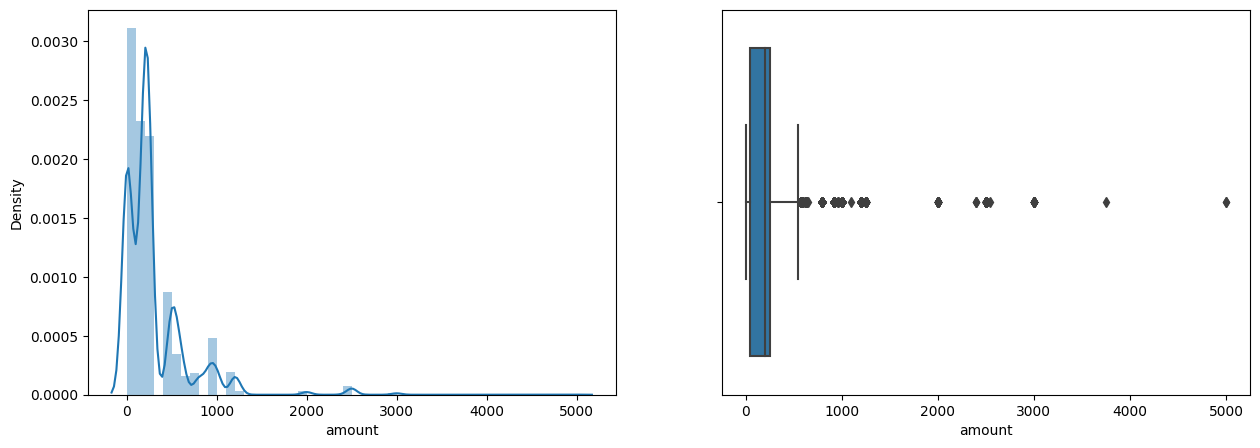

In [31]:
# amount density plot and boxplot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df["amount"], ax=ax[0])
sns.boxplot(x="amount", data=df, ax=ax[1])


> <font color="yellow"> As we know median amount spent by users is 200 , there are very few users who spent greater than 1000

User id --->> "665cac69553c702415f9a428"   and   "66b72a211cb75483184fb3eb"  are our star spending users


In [32]:
# user who spent maximum amount
df[df["amount"] == df["amount"].max()]

,id,uid,order id,status,amount,gst,utc time,gurujiuser,gateway,mode,totalamount,istdate
361,665cac69553c702415f9a428,111145,order_OHyXtlkd9Dq5E4,captured,5000.0,900.0,2024-06-02 17:31:21.293000+00:00,True,Razorpay,app,5900.0,2024-06-02 23:01:21.293000+00:00
13367,66b72a211cb75483184fb3eb,5667,order_Oj8YLk9ikIbCpq,captured,5000.0,900.0,2024-08-10 08:51:45.915000+00:00,True,Razorpay,app,5900.0,2024-08-10 14:21:45.915000+00:00


> ### <font color="yellow"> Bi-variate analysis :

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           13515 non-null  object             
 1   uid          13515 non-null  int64              
 2   order id     13515 non-null  object             
 3   status       13515 non-null  object             
 4   amount       13515 non-null  float64            
 5   gst          13515 non-null  float64            
 6   utc time     13515 non-null  datetime64[ns, UTC]
 7   gurujiuser   13515 non-null  object             
 8   gateway      13515 non-null  object             
 9   mode         13515 non-null  object             
 10  totalamount  13515 non-null  float64            
 11  istdate      13515 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(3), int64(1), object(6)
memory usage: 1.2+ MB


> #### <font color="yellow"> Group by gurujiuser : 

In [34]:
# group by :
df.groupby("gurujiuser")[["amount", "gst", "totalamount"]].agg(["sum", "count", "mean","median" ,"min", "max"])

amount                                                gst  \
                  sum count        mean median    min     max        sum   
gurujiuser                                                                 
False        964850.0  6242  154.573855   30.0    1.0  3000.0  157883.94   
True        2861145.0  6658  429.730400  250.0    1.0  5000.0  470322.90   
unknown      176930.0   615  287.691057  200.0  100.0  3000.0   28674.00   

                                                totalamount                    \
           count       mean median   min    max         sum count        mean   
gurujiuser                                                                      
False       6242  25.293806    5.4  0.00  540.0  1122733.94  6242  179.867661   
True        6658  70.640267   36.0  0.18  900.0  3331467.90  6658  500.370667   
unknown      615  46.624390   36.0  0.00  540.0   205604.00   615  334.315447   

                                   
           median     min     max  
gurujiuser                         
False        35.4    1.18  3540.0  
True        286.0    1.18  5900.0  
unknown     236.0  100.00  3540.0

<AxesSubplot: xlabel='gurujiuser'>

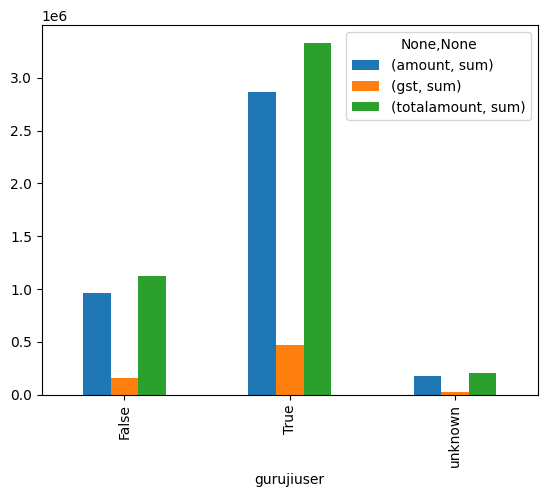

In [35]:
# total amount based on gurujiuser
df.groupby("gurujiuser")[["amount", "gst", "totalamount"]].agg(["sum"]).plot(kind="bar")

> #### <font color="yellow"> Observation :

We could observe that even though count of exisitng , new users  is almost equal however the total amount ,

mean of amount contributed by existing users is far greater than new users



<AxesSubplot: xlabel='totalamount', ylabel='gurujiuser'>

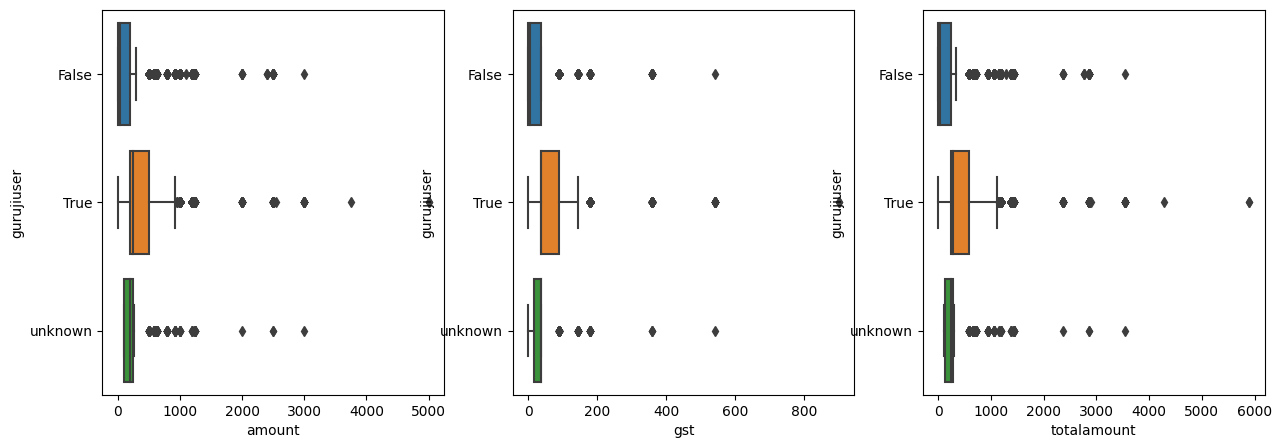

In [36]:
# boxplot
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x="amount", y="gurujiuser", data=df, ax=ax[0])
sns.boxplot(x="gst", y="gurujiuser", data=df, ax=ax[1])
sns.boxplot(x="totalamount", y="gurujiuser", data=df, ax=ax[2])

> <font color="yellow"> This proves that point that the median amount spent by existing users is far greater than new users

<AxesSubplot: xlabel='gurujiuser'>

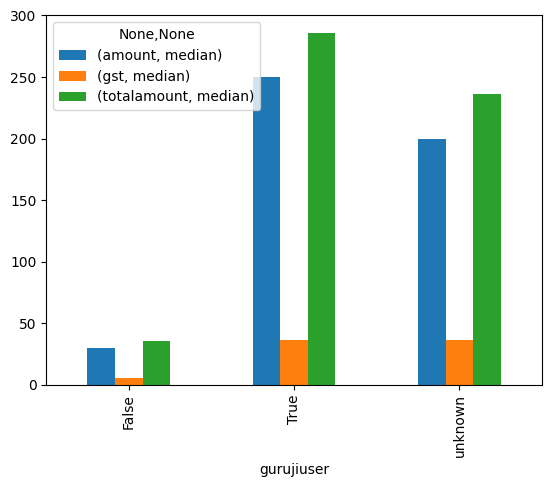

In [37]:
df.groupby("gurujiuser")[["amount", "gst", "totalamount"]].agg(["median"]).plot(kind="bar")

In [38]:
df.groupby("gurujiuser")[["amount", "gst", "totalamount"]].agg(["median"])

,amount,gst,totalamount
,median,median,median
gurujiuser,,,
False,30.0,5.4,35.4
True,250.0,36.0,286.0
unknown,200.0,36.0,236.0


> <font color="yellow"> We could see that the median amount spent by existing users [250] is far greater than new users [30] 

This could be of various reasons like existing users are more loyal to the platform , they pay more amount or they are more active users 

or the new users are skeptical whether to pay more or not

In [39]:
df.groupby("mode")[["amount", "gst", "totalamount"]].agg(["sum", "count", "mean","median" ,"min", "max"])


amount                                                 gst         \
             sum  count        mean median    min     max        sum  count   
mode                                                                          
app    3163014.0  10959  288.622502  200.0    1.0  5000.0  519084.54  10959   
ios     740453.0   2246  329.676313  230.0    1.0  2500.0  122081.40   2246   
other    41753.0    162  257.734568  230.0    1.0  2500.0    6948.90    162   
web      57705.0    148  389.898649  230.0  100.0  2500.0    8766.00    148   

                                     totalamount                            \
            mean median   min    max         sum  count        mean median   
mode                                                                         
app    47.366050   36.0  0.18  900.0  3682098.54  10959  335.988552  236.0   
ios    54.355031   36.0  0.18  360.0   862534.40   2246  384.031345  266.0   
other  42.894444   36.0  0.00  360.0    48701.90    162  300.629012  266.0   
web    59.229730   36.0  0.00  360.0    66471.00    148  449.128378  266.0   

                       
          min     max  
mode                   
app      1.18  5900.0  
ios      1.18  2860.0  
other    1.18  2860.0  
web    100.00  2860.0

<AxesSubplot: xlabel='mode'>

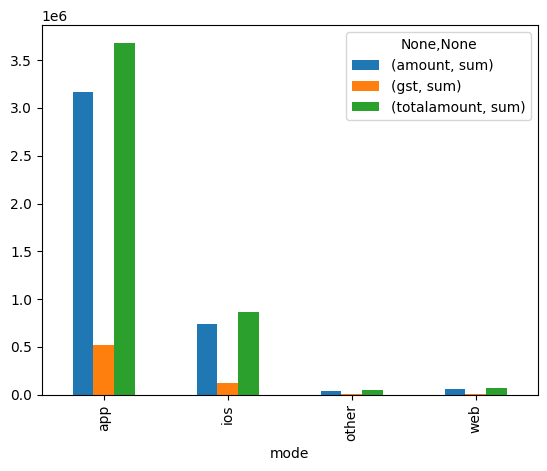

In [40]:
df.groupby("mode")[["amount", "gst", "totalamount"]].agg(["sum"]).plot(kind="bar")

> <font color="yellow"> The total amount spent by Android users is  3X more than IOS users 

However the median  and mean amount spent by IOS users is greater than Android users

In [41]:
df.groupby("mode")[["amount", "gst", "totalamount"]].agg(["mean","median" ,"min", "max"])


amount                              gst                      \
             mean median    min     max       mean median   min    max   
mode                                                                     
app    288.622502  200.0    1.0  5000.0  47.366050   36.0  0.18  900.0   
ios    329.676313  230.0    1.0  2500.0  54.355031   36.0  0.18  360.0   
other  257.734568  230.0    1.0  2500.0  42.894444   36.0  0.00  360.0   
web    389.898649  230.0  100.0  2500.0  59.229730   36.0  0.00  360.0   

      totalamount                         
             mean median     min     max  
mode                                      
app    335.988552  236.0    1.18  5900.0  
ios    384.031345  266.0    1.18  2860.0  
other  300.629012  266.0    1.18  2860.0  
web    449.128378  266.0  100.00  2860.0

## <font color="yellow"> usersdata for assignment  Analysis : 

In [42]:
df1 = pd.read_csv('usersdata for assignment - usersdata for assignment.csv')
df1.head()

C:\Users\mahik\AppData\Local\Temp\ipykernel_10584\2161791052.py:1: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('usersdata for assignment - usersdata for assignment.csv')


,wallet,isInternational,consultationCount,website,totalRecharge,chatConsultationCount,totalRechargeAmount,createdAt,_id,uid,role,gurujiUser,ISTDate
0,0.0,False,0,"[""app""]",0,0,0.00,2024-08-17T18:21:19.188Z,66c0ea1f0c7600d494a2c8f7,277766.0,user,True,2024-08-17T23:51:19.188Z
1,160.0,False,2,"[""iOS""]",2,0,89.68,2024-08-17T18:05:50.878Z,66c0e67e0c7600d494a1a3fd,277765.0,user,False,2024-08-17T23:35:50.878Z
2,0.0,False,0,"[""app""]",0,1,0.00,2024-08-17T17:53:14.593Z,66c0e38a0c7600d494a122ba,277764.0,user,False,2024-08-17T23:23:14.593Z
3,0.0,False,0,"[""app""]",0,0,0.00,2024-08-17T17:49:44.793Z,66c0e2b80c7600d494a0f9c5,277763.0,user,True,2024-08-17T23:19:44.793Z
4,0.0,False,0,"[""app""]",0,0,0.00,2024-08-17T17:12:06.793Z,66c0d9e60c7600d4949d6671,277762.0,user,True,2024-08-17T22:42:06.793Z


In [43]:
df1.isnull().sum()

wallet                   0
isInternational          2
consultationCount        0
website                  0
totalRecharge            0
chatConsultationCount    0
totalRechargeAmount      0
createdAt                0
_id                      0
uid                      1
role                     1
gurujiUser               1
ISTDate                  0
dtype: int64

> <font color="yellow"> want to see whether the _id in df and df1 is same


In [44]:
# want to see whether the _id in df and df1 is same
df[df["id"].isin(df1["_id"])]

,id,uid,order id,status,amount,gst,utc time,gurujiuser,gateway,mode,totalamount,istdate
5357,6.69E+23,23848,order_OUV44w7SjSK3xL,captured,1.0,0.18,2024-07-04 09:08:02.065000+00:00,False,Razorpay,app,1.18,2024-07-04 14:38:02.065000+00:00
5373,6.69E+23,237900,order_OUWRo8XdGI7eTi,captured,1.0,0.18,2024-07-04 10:29:11.491000+00:00,False,Razorpay,app,1.18,2024-07-04 15:59:11.491000+00:00
5397,6.69E+23,34654,order_OUYG6bMKBCoNkm,captured,1.0,0.18,2024-07-04 12:15:30.036000+00:00,False,Razorpay,ios,1.18,2024-07-04 17:45:30.036000+00:00
5578,6.69E+23,241260,order_OUqBypzaTzeO3X,captured,1.0,0.18,2024-07-05 05:48:04.785000+00:00,False,Razorpay,app,1.18,2024-07-05 11:18:04.785000+00:00


In [45]:
df1.columns

Index(['wallet', 'isInternational', 'consultationCount', 'website',
       'totalRecharge', 'chatConsultationCount', 'totalRechargeAmount',
       'createdAt', '_id', 'uid', 'role', 'gurujiUser', 'ISTDate'],
      dtype='object')

In [46]:
# check if _id in df1 is same as id in df
df1[df1["_id"].isin(df["id"])]


,wallet,isInternational,consultationCount,website,totalRecharge,chatConsultationCount,totalRechargeAmount,createdAt,_id,uid,role,gurujiUser,ISTDate
36468,0.0,False,0,"[""app""]",0,1,0.00,2024-07-05T05:24:41.789Z,6.69E+23,241244.0,user,False,2024-07-05T10:54:41.789Z
37155,25.0,False,0,"[""app""]",1,1,1.18,2024-07-04T11:27:03.752Z,6.69E+23,240557.0,user,False,2024-07-04T16:57:03.752Z
37249,0.0,False,0,"[""app""]",0,0,0.00,2024-07-04T10:14:47.236Z,6.69E+23,240463.0,user,False,2024-07-04T15:44:47.236Z
37355,0.0,False,0,"[""app""]",0,0,0.00,2024-07-04T09:12:07.261Z,6.69E+23,240357.0,user,False,2024-07-04T14:42:07.261Z
37359,0.0,False,0,"[""app""]",0,1,0.00,2024-07-04T09:07:21.191Z,6.69E+23,240353.0,user,False,2024-07-04T14:37:21.191Z
37369,0.0,False,0,"[""ios""]",0,1,0.00,2024-07-04T08:59:50.752Z,6.69E+23,240343.0,user,False,2024-07-04T14:29:50.752Z


>#### <font color="yellow"> Observation : We could observe that only few users present in "userdata for assignment" are present in "recharges for assignment" data 

So it's not a good idea to merge these two datasets and the features in both these datasets convey different information

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83256 entries, 0 to 83255
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wallet                 83256 non-null  float64
 1   isInternational        83254 non-null  object 
 2   consultationCount      83256 non-null  int64  
 3   website                83256 non-null  object 
 4   totalRecharge          83256 non-null  int64  
 5   chatConsultationCount  83256 non-null  int64  
 6   totalRechargeAmount    83256 non-null  float64
 7   createdAt              83256 non-null  object 
 8   _id                    83256 non-null  object 
 9   uid                    83255 non-null  float64
 10  role                   83255 non-null  object 
 11  gurujiUser             83255 non-null  object 
 12  ISTDate                83256 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 8.3+ MB


In [48]:
# createdAt and ISTDate datetime conversion
df1["createdAt"] = pd.to_datetime(df1["createdAt"])
df1["ISTDate"] = pd.to_datetime(df1["ISTDate"])



In [49]:
# Percentage of null values in each column
df1.isnull().mean()

wallet                   0.000000
isInternational          0.000024
consultationCount        0.000000
website                  0.000000
totalRecharge            0.000000
chatConsultationCount    0.000000
totalRechargeAmount      0.000000
createdAt                0.000000
_id                      0.000000
uid                      0.000012
role                     0.000012
gurujiUser               0.000012
ISTDate                  0.000000
dtype: float64

> As we can see that just one or two rows are missing in user data for assignment , lets drop them

In [50]:
# drop na 
df1.dropna(inplace=True)

In [51]:
# duplicates
df1.duplicated().sum()  # No duplicates either

0

In [52]:
df1.describe()

,wallet,consultationCount,totalRecharge,chatConsultationCount,totalRechargeAmount,uid
count,83253.000000,83253.000000,83253.000000,83253.000000,83253.000000,83253.000000
mean,2.153966,0.167153,0.117173,0.674510,23.641095,236065.031062
std,51.681043,3.149264,2.822339,1.375051,1184.276838,24094.292266
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,215211.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,236076.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,256910.000000
max,10000.000000,538.000000,463.000000,298.000000,193124.000000,277766.000000


In [53]:
# sum 
df1[["wallet", "totalRecharge", "totalRechargeAmount"]].agg(["sum", "count", "mean","median" ,"min", "max"])

,wallet,totalRecharge,totalRechargeAmount
sum,179324.115784,9755.000000,1.968192e+06
count,83253.000000,83253.000000,8.325300e+04
mean,2.153966,0.117173,2.364110e+01
median,0.000000,0.000000,0.000000e+00
min,0.000000,0.000000,0.000000e+00
max,10000.000000,463.000000,1.931240e+05


> #### <font color="yellow"> Uni-variate & Bi-variate analysis :

In [54]:
# cat columns
cat_cols = [col for col in df1.columns if df1[col].dtypes == "object"]
cat_cols

['isInternational', 'website', '_id', 'role', 'gurujiUser']

In [55]:
for col in ['isInternational', 'website', 'role', 'gurujiUser']:
    print(df1[col].value_counts(dropna=False))

False    83215
True        38
Name: isInternational, dtype: int64
["app"]          77899
["ios"]           2332
["iOS"]           2139
["gurucool"]       880
["dashboard"]        3
Name: website, dtype: int64
user         83243
operation       10
Name: role, dtype: int64
False    79960
True      3293
Name: gurujiUser, dtype: int64


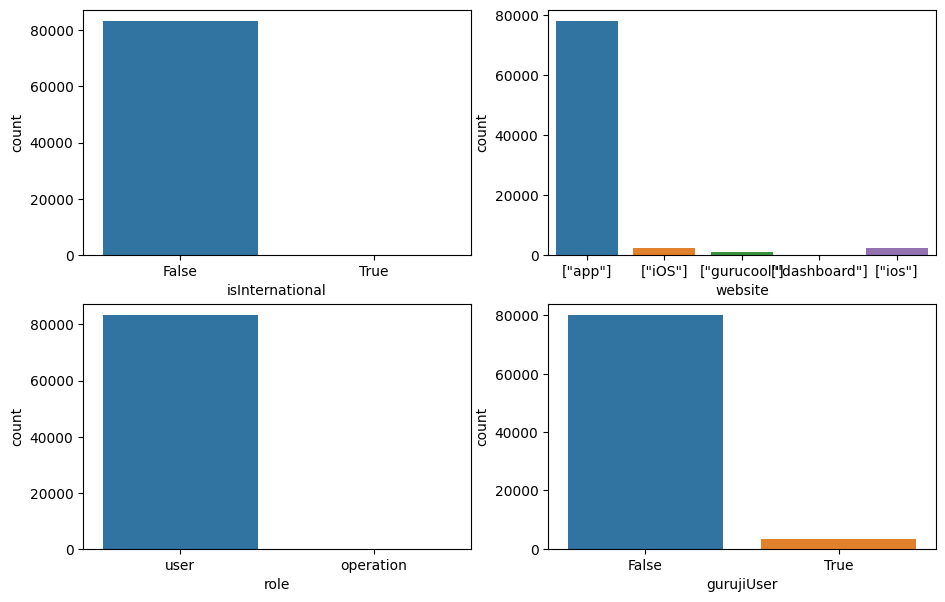

In [56]:
# draw bar plots for ['isInternational', 'website', 'role', 'gurujiUser'] under subplot
fig, ax = plt.subplots(2,2, figsize=(11,7))
sns.countplot(x="isInternational", data=df1, ax=ax[0,0])
sns.countplot(x="website", data=df1, ax=ax[0,1])
sns.countplot(x="role", data=df1, ax=ax[1,0])
sns.countplot(x="gurujiUser", data=df1, ax=ax[1,1])
plt.show()

>#### <font color="yellow"> Observation :

<font color="yellow">  Most of the users are from India and are not international users 

uses Andriod app for interacting with the platform and more than 95 percent in userdata for assignment are new  users



In [57]:
df1.groupby("gurujiUser")[["wallet", "totalRecharge", "totalRechargeAmount"]].agg(["sum", "count", "mean","median" ,"min", "max"])

wallet                                           \
                      sum  count      mean median  min         max   
gurujiUser                                                           
False       165679.238550  79960  2.072026    0.0  0.0  10000.0000   
True         13644.877233   3293  4.143601    0.0  0.0   5618.8815   

           totalRecharge                                  totalRechargeAmount  \
                     sum  count      mean median min  max                 sum   
gurujiUser                                                                      
False               9059  79960  0.113294    0.0   0  463          1729162.56   
True                 696   3293  0.211357    0.0   0  405           239029.54   

                                                    
            count       mean median  min       max  
gurujiUser                                          
False       79960  21.625345    0.0  0.0  154734.0  
True         3293  72.587167    0.0  0.0  193124.0

In [58]:
df1.groupby("website")[["wallet", "totalRecharge", "totalRechargeAmount"]].agg(["sum", "count", "mean","median" ,"min", "max"])

wallet                                               \
                         sum  count        mean median  min           max   
website                                                                     
["app"]        144898.984600  77899    1.860088    0.0  0.0  10000.000000   
["dashboard"]    1276.859617      3  425.619872    0.0  0.0   1276.859617   
["gurucool"]     9029.526383    880   10.260825    0.0  0.0   1709.700000   
["iOS"]         15742.857067   2139    7.359914    0.0  0.0   6000.000000   
["ios"]          8375.888117   2332    3.591719    0.0  0.0   1579.750000   

              totalRecharge                                   \
                        sum  count      mean median min  max   
website                                                        
["app"]                8456  77899  0.108551    0.0   0  463   
["dashboard"]             3      3  1.000000    0.0   0    3   
["gurucool"]            325    880  0.369318    0.0   0  172   
["iOS"]                 483   2139  0.225806    0.0   0   62   
["ios"]                 488   2332  0.209262    0.0   0   49   

              totalRechargeAmount                                            
                              sum  count        mean median  min        max  
website                                                                      
["app"]                1650063.28  77899   21.182086    0.0  0.0  193124.00  
["dashboard"]             1240.18      3  413.393333    0.0  0.0    1240.18  
["gurucool"]            174000.06    880  197.727341    0.0  0.0  141867.00  
["iOS"]                  56754.00   2139   26.532959    0.0  0.0   12045.00  
["ios"]                  86134.58   2332   36.935926    0.0  0.0   10964.00

<AxesSubplot: xlabel='website'>

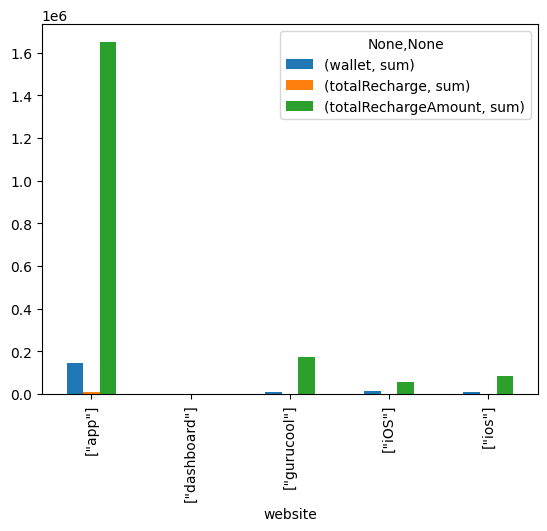

In [59]:
df1.groupby("website")[["wallet", "totalRecharge", "totalRechargeAmount"]].agg(["sum"]).plot(kind="bar")

>Since this dataset contains most of the new users who use android app we can expect that the total amount contributed by these users is greater than rest

In [60]:
df.columns

Index(['id', 'uid', 'order id', 'status', 'amount', 'gst', 'utc time',
       'gurujiuser', 'gateway', 'mode', 'totalamount', 'istdate'],
      dtype='object')

In [61]:
df1.columns

Index(['wallet', 'isInternational', 'consultationCount', 'website',
       'totalRecharge', 'chatConsultationCount', 'totalRechargeAmount',
       'createdAt', '_id', 'uid', 'role', 'gurujiUser', 'ISTDate'],
      dtype='object')

## <font color="yellow"> Cohort analysis :

In [62]:
# 1. First, let's create a cohort based on the first transaction date for each user
df['transaction_date'] = pd.to_datetime(df['istdate']).dt.to_period('M')
cohort = df.groupby('uid')['transaction_date'].min().reset_index()
cohort.columns = ['uid', 'cohort_date']


C:\Users\mahik\AppData\Local\Temp\ipykernel_10584\3244004837.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['transaction_date'] = pd.to_datetime(df['istdate']).dt.to_period('M')


In [63]:
cohort.head()

,uid,cohort_date
0,19,2024-07
1,162,2024-06
2,437,2024-06
3,463,2024-07
4,466,2024-06


> <font color="yellow"> Observation : Transaction date tells us the month of the transaction and cohort date tells us the month of the first transaction for each user based on uid

In [64]:

# Merge cohort dates back to the main dataframe
df = df.merge(cohort, on='uid', how='left')

#  Calculate the number of periods between transaction_date and cohort_date

# The subtraction of two Period objects returns a Period offset
# .n extracts the number of periods (months in this case) from this offset
df['cohort_index'] = (df['transaction_date'] - df['cohort_date']).apply(lambda x: x.n)



In [67]:
df.head()

,id,uid,order id,status,amount,gst,utc time,gurujiuser,gateway,mode,totalamount,istdate,transaction_date,cohort_date,cohort_index
0,665a173b9efc2e9fa90ab8c3,209937,order_OHCTwUL5S4z9kY,captured,100.0,18.0,2024-05-31 18:30:19.083000+00:00,False,Razorpay,app,118.0,2024-06-01 00:00:19.083000+00:00,2024-06,2024-06,0
1,665a179c9efc2e9fa90af52a,119321,order_OHCVex44YhZDba,captured,100.0,18.0,2024-05-31 18:31:56.624000+00:00,True,Razorpay,ios,118.0,2024-06-01 00:01:56.624000+00:00,2024-06,2024-06,0
2,665a18099efc2e9fa90b46b6,119321,order_OHCXZM6fCvpYVu,captured,920.0,144.0,2024-05-31 18:33:45.091000+00:00,True,Razorpay,ios,1064.0,2024-06-01 00:03:45.091000+00:00,2024-06,2024-06,0
3,665a1a1d9efc2e9fa90cd84c,212656,order_OHCgwQVPGVdZfj,captured,200.0,36.0,2024-05-31 18:42:37.431000+00:00,False,Razorpay,app,236.0,2024-06-01 00:12:37.431000+00:00,2024-06,2024-06,0
4,665a1c599efc2e9fa90e4592,209937,order_OHCr0nTyLd2re5,captured,100.0,18.0,2024-05-31 18:52:09.436000+00:00,False,Razorpay,app,118.0,2024-06-01 00:22:09.436000+00:00,2024-06,2024-06,0


In [68]:
# min and max istdate 
print(df["istdate"].min(), df["istdate"].max())

2024-06-01 00:00:19.083000+00:00 2024-08-10 23:59:22.393000+00:00


In [66]:
df["cohort_index"].value_counts()

0    8959
1    3532
2    1024
Name: cohort_index, dtype: int64

This creates groups like:

(Jan 2023, 0) = Users who joined in Jan 2023, their first month

(Jan 2023, 1) = Users who joined in Jan 2023, their second month

(Feb 2023, 0) = Users who joined in Feb 2023, their first month etc.

In [69]:
# Create the cohort table for user retention

cohort_data = df.groupby(['cohort_date', 'cohort_index'])['uid'].nunique().reset_index()

cohort_table = cohort_data.pivot(index='cohort_date', columns='cohort_index', values='uid')

In [77]:
cohort_data

,cohort_date,cohort_index,uid
0,2024-06,0,1132
1,2024-06,1,344
2,2024-06,2,198
3,2024-07,0,2852
4,2024-07,1,98
5,2024-08,0,525


> <font color="yellow"> The pivot is beneficial because:

Each row represents one cohort (users who started in the same month)
Each column represents months since first transaction (cohort_index)
Values show how many users were active in each period

Makes it easier to:

Read retention rates across time

Compare different cohorts side by side


In [76]:
cohort_table

cohort_index,0,1,2
cohort_date,,,
2024-06,1132.0,344.0,198.0
2024-07,2852.0,98.0,NaN
2024-08,525.0,NaN,NaN


In [78]:
cohort_table[0]

cohort_date
2024-06    1132.0
2024-07    2852.0
2024-08     525.0
Freq: M, Name: 0, dtype: float64

In [72]:
# Calculate retention rates

cohort_sizes = cohort_table[0]

retention_table = cohort_table.divide(cohort_sizes, axis=0) * 100

> <font color="yellow"> Observation :

We need to calculate how much the cohort has grown each month, that's why we took the intial cohort size for the first month as base , from there we can calculate the retention rate

>#### <font color="yellow"> Retention table for each cohort : 

In [79]:
retention_table

cohort_index,0,1,2
cohort_date,,,
2024-06,100.0,30.388693,17.491166
2024-07,100.0,3.436185,NaN
2024-08,100.0,NaN,NaN


> <font color="yellow"> Observation :

NaN in the retention table represents :

Future Months:

For recent cohorts, NaN appears in future months because that data doesn't exist yet

Example: For a cohort that started in June 2023, you can't have data for their behavior 6 months later if it's only July 2023

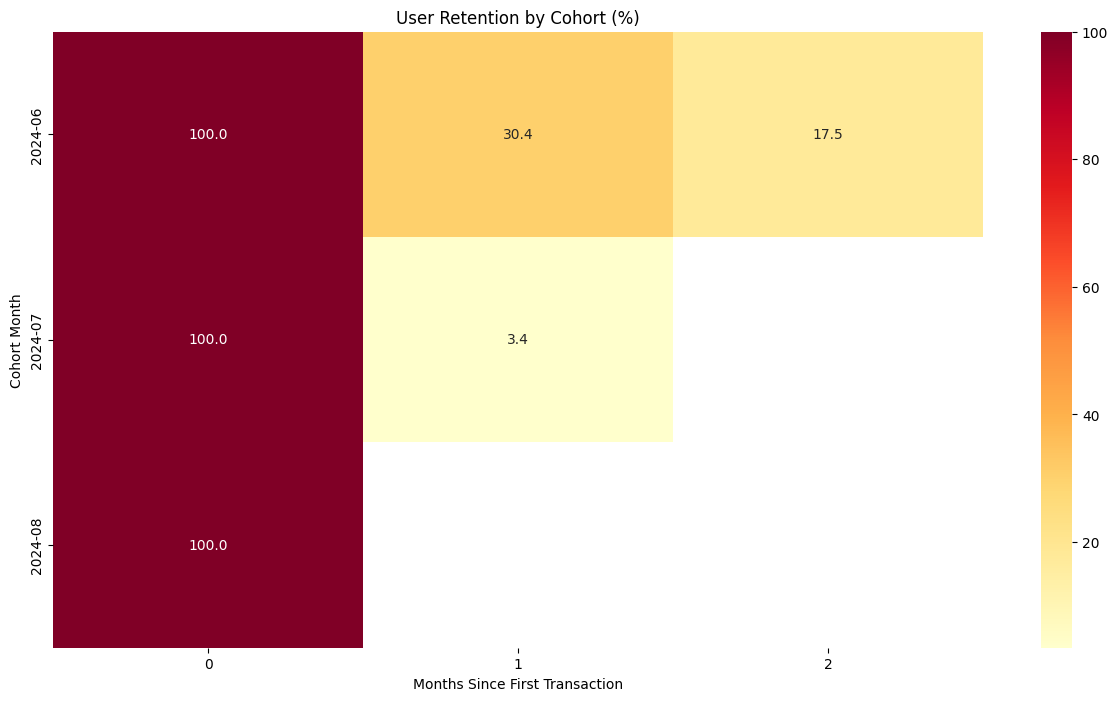

In [80]:
# Visualize the retention rates using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(retention_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('User Retention by Cohort (%)')
plt.xlabel('Months Since First Transaction')
plt.ylabel('Cohort Month')
plt.show()


> ##### <font color="yellow"> Calculate average transaction amount by cohort : 


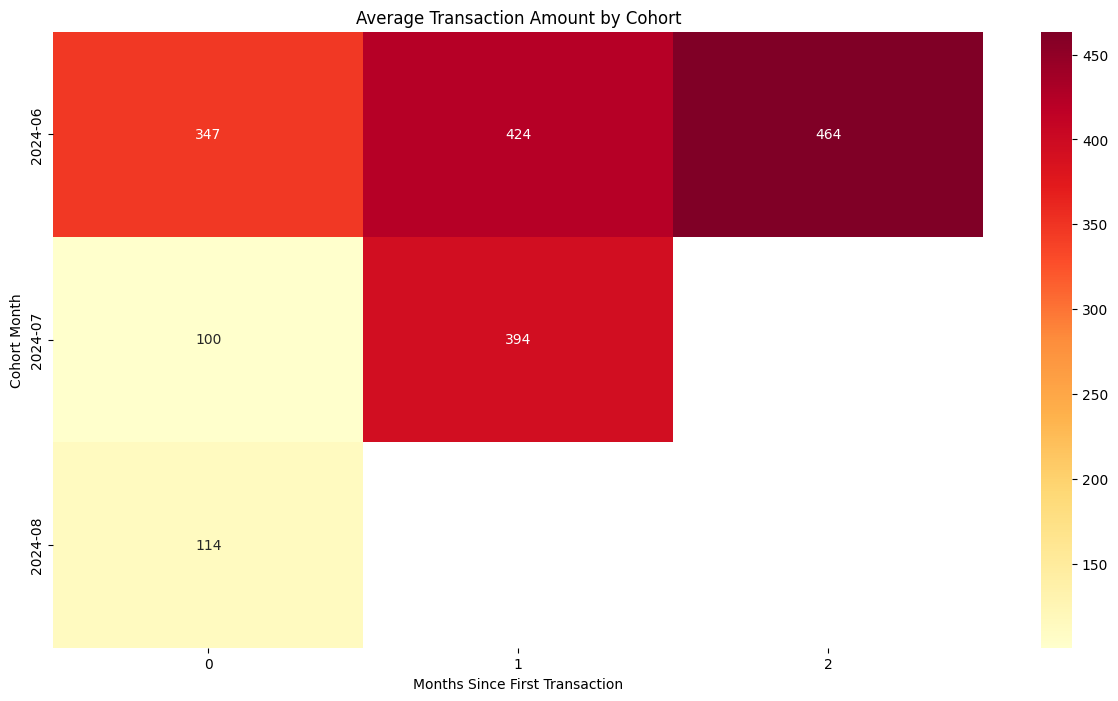

In [81]:

amount_cohort = df.groupby(['cohort_date', 'cohort_index'])['amount'].mean().reset_index()
amount_cohort_table = amount_cohort.pivot(index='cohort_date', columns='cohort_index', values='amount')

plt.figure(figsize=(15, 8))
sns.heatmap(amount_cohort_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Transaction Amount by Cohort')
plt.xlabel('Months Since First Transaction')
plt.ylabel('Cohort Month')
plt.show()

> <font color="yellow"> Observation :

This analysis helps understand:

Initial spending patterns of new users 

How spending behavior changes over time

Which cohorts have higher/lower average transaction values

> <font color="yellow"> After spending some time i.e after a month we could see that the average transaction amount is higher for the first month of the cohort , however the retention rate is lower

In [82]:
amount_cohort_table

cohort_index,0,1,2
cohort_date,,,
2024-06,346.882558,423.739552,463.530273
2024-07,100.382281,393.608696,NaN
2024-08,114.264910,NaN,NaN


> <font color="yellow">  Additional analysis - Total transaction value by cohort : 


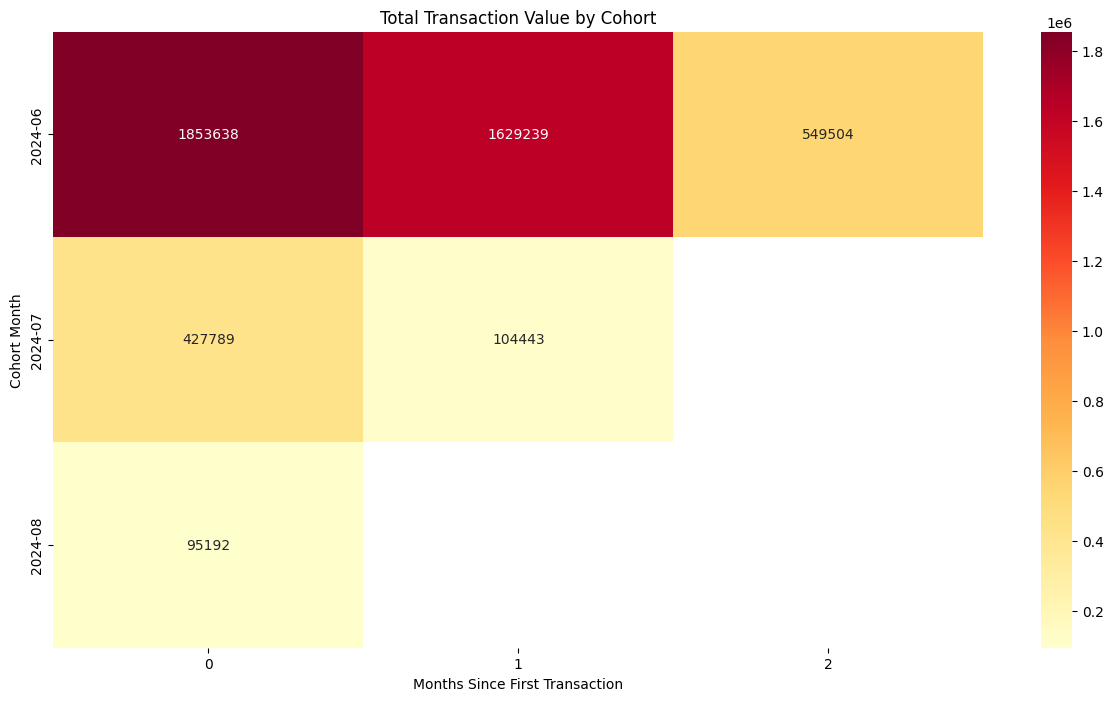

In [83]:
# Additional analysis - Total transaction value by cohort

total_amount_cohort = df.groupby(['cohort_date', 'cohort_index'])['totalamount'].sum().reset_index()
total_amount_table = total_amount_cohort.pivot(index='cohort_date', columns='cohort_index', values='totalamount')

plt.figure(figsize=(15, 8))
sns.heatmap(total_amount_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Total Transaction Value by Cohort')
plt.xlabel('Months Since First Transaction')
plt.ylabel('Cohort Month')
plt.show()



In [84]:
#  Print summary statistics for each cohort
print("Cohort Summary Statistics:")
print("-" * 50)
cohort_summary = df.groupby('cohort_date').agg({
    'uid': 'nunique',
    'amount': ['mean', 'sum'],
    'totalamount': 'sum'
}).round(2)

print(cohort_summary)


Cohort Summary Statistics:
--------------------------------------------------
                uid  amount            totalamount
            nunique    mean        sum         sum
cohort_date                                       
2024-06        1132  388.79  3462912.0  4032381.42
2024-07        2852  117.73   457628.0   532232.24
2024-08         525  114.26    82385.0    95192.18


>### <font color="yellow"> Revenue Growth Analysis : 

In [ ]:
#  First, let's create time-based revenue analysis
df['month_year'] = pd.to_datetime(df['istdate']).dt.to_period('M')

# Monthly revenue trends
monthly_revenue = df.groupby('month_year').agg({
    'amount': 'sum',
    'uid': 'nunique',
    'order id': 'count'
}).reset_index()


In [86]:
monthly_revenue

,month_year,amount,uid,order id
0,2024-06,1589069.0,1132,4581
1,2024-07,1766286.0,3196,6959
2,2024-08,647570.0,821,1975


In [87]:
# Calculate month-over-month growth
monthly_revenue['revenue_growth'] = monthly_revenue['amount'].pct_change() * 100
monthly_revenue['user_growth'] = monthly_revenue['uid'].pct_change() * 100

In [88]:
monthly_revenue

,month_year,amount,uid,order id,revenue_growth,user_growth
0,2024-06,1589069.0,1132,4581,NaN,NaN
1,2024-07,1766286.0,3196,6959,11.152253,182.332155
2,2024-08,647570.0,821,1975,-63.337195,-74.311640


> We could observe that the there is decline in revenue and user growth over time

In [89]:
#  Customer Segmentation based on total spend
user_spending = df.groupby('uid')['amount'].agg(['sum', 'count']).reset_index()
user_spending['avg_transaction'] = user_spending['sum'] / user_spending['count']


In [90]:
user_spending

,uid,sum,count,avg_transaction
0,19,1.0,1,1.000000
1,162,1500.0,3,500.000000
2,437,96615.0,158,611.487342
3,463,16815.0,14,1201.071429
4,466,56675.0,38,1491.447368
...,...,...,...,...
4504,273086,1.0,1,1.000000
4505,273098,31.0,2,15.500000
4506,273102,1.0,1,1.000000
4507,316468,900.0,3,300.000000


>#### <font color="yellow"> Segementing users based on their spending habits:

In [92]:
# Define customer segments using custom logic instead of qcut
def get_segment(amount):
    if amount <= 500:
        return 'Bronze'
    elif amount <= 1000:
        return 'Silver'
    elif amount <= 2000:
        return 'Gold'
    else:
        return 'Platinum'

user_spending['segment'] = user_spending['sum'].apply(get_segment)

#  Merge with user data (df1) for deeper analysis
user_analysis = user_spending.merge(df1, on='uid', how='left')

> <font color="yellow"> Customer Segment Distribution :

In [94]:
user_spending["segment"].value_counts()

Bronze      3880
Platinum     327
Silver       161
Gold         141
Name: segment, dtype: int64

> <font color="yellow"> Observation :  Monthly Revenue Trend

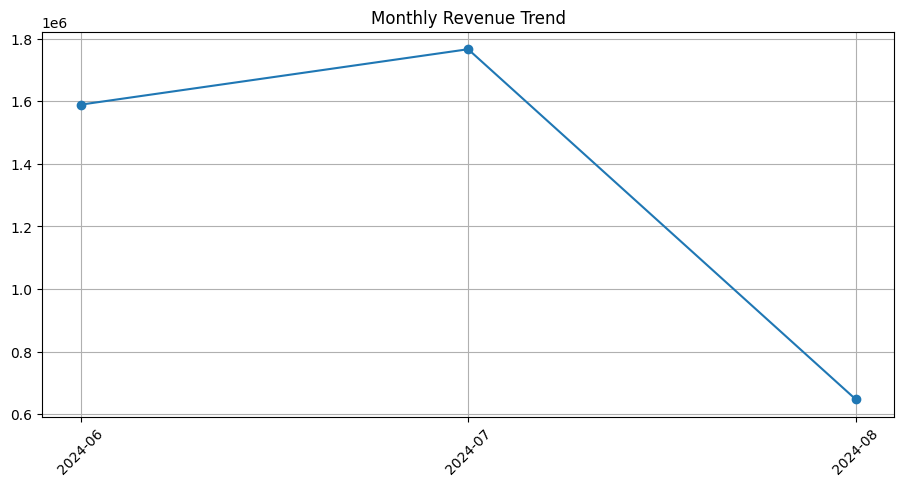

In [97]:
# Plot 1: Monthly Revenue Trend
plt.figure(figsize=(11, 5))
plt.plot(range(len(monthly_revenue)), monthly_revenue['amount'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(range(len(monthly_revenue)), monthly_revenue['month_year'], rotation=45)
plt.grid(True)
plt.show()



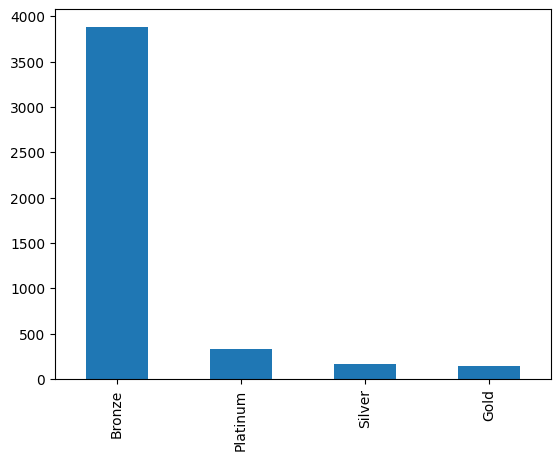

In [100]:
user_spending["segment"].value_counts().plot(kind='bar')
plt.show()

> <font color="yellow"> Observation : We could observe that most of the users are in Bronze segment i.e they spend less than 500 

However we need to check whether the revenue generated by these users is greater than other segments or not : 

In [103]:
user_spending.groupby('segment')['sum'].sum()

segment
Bronze       202871.0
Gold         200588.0
Platinum    3477213.0
Silver       122253.0
Name: sum, dtype: float64

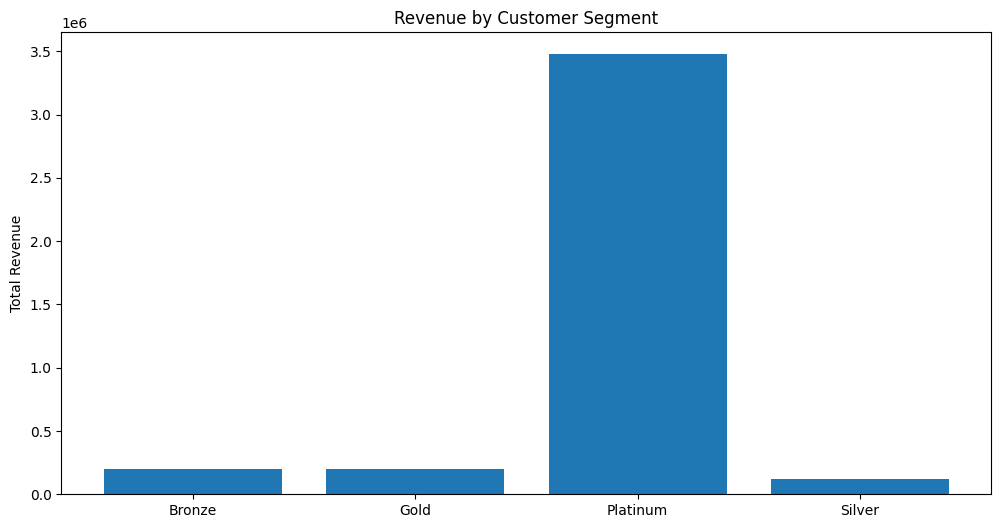

In [98]:
#  Revenue by Customer Segment
plt.figure(figsize=(12, 6))
segment_revenue = user_spending.groupby('segment')['sum'].sum()
plt.bar(segment_revenue.index, segment_revenue.values)
plt.title('Revenue by Customer Segment')
plt.ylabel('Total Revenue')
plt.show()

> <font color="yellow"> Observation : If we sum up the total revenue generated by all the users in each segment , we could observe that the total revenue generated by platinum segment is the highest per user (uid)

In [106]:
user_spending.groupby('segment')['avg_transaction'].mean()

segment
Bronze       39.363466
Gold        434.316264
Platinum    627.678556
Silver      370.877226
Name: avg_transaction, dtype: float64

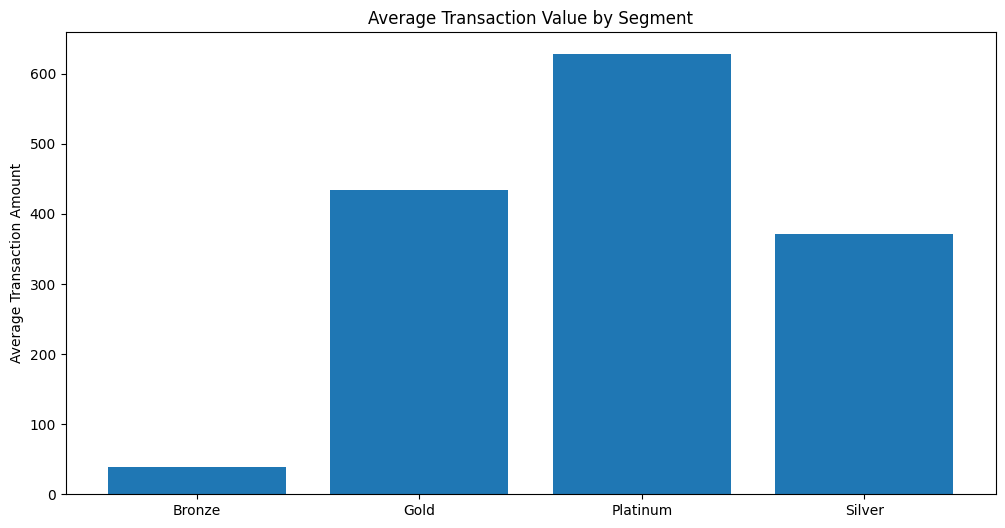

In [104]:
#  Average Transaction Value by Segment
plt.figure(figsize=(12, 6))
avg_transaction = user_spending.groupby('segment')['avg_transaction'].mean()
plt.bar(avg_transaction.index, avg_transaction.values)
plt.title('Average Transaction Value by Segment')
plt.ylabel('Average Transaction Amount')
plt.show()


> <font color="yellow"> Observation : Average ticket size  (Average transaction value) for platinum segment is high , followed by gold segment per user basis

In [107]:
# Print Key Metrics
print("\nKey Growth Metrics:")
print("-" * 50)
print(f"Total Revenue: ₹{df['amount'].sum():,.2f}")
print(f"Total Unique Customers: {df['uid'].nunique():,}")
print(f"Average Transaction Value: ₹{df['amount'].mean():,.2f}")

print("\nSegment Analysis:")
print("-" * 50)
segment_analysis = user_spending.groupby('segment').agg({
    'uid': 'count',
    'sum': ['sum', 'mean'],
    'count': 'mean'
}).round(2)
print(segment_analysis)


Key Growth Metrics:
--------------------------------------------------
Total Revenue: ₹4,002,925.00
Total Unique Customers: 4,509
Average Transaction Value: ₹296.18

Segment Analysis:
--------------------------------------------------
           uid        sum            count
         count        sum      mean   mean
segment                                   
Bronze    3880   202871.0     52.29   1.16
Gold       141   200588.0   1422.61   4.59
Platinum   327  3477213.0  10633.68  24.16
Silver     161   122253.0    759.34   2.83


>#### <font color="yellow">  User Type Analysis : 
 

In [108]:
#  User Engagement Analysis
if 'consultationCount' in df1.columns:
    print("\nUser Engagement Analysis:")
    print("-" * 50)
    engagement_metrics = df1.groupby('role').agg({
        'consultationCount': ['mean', 'max'],
        'totalRechargeAmount': ['mean', 'sum']
    }).round(2)
    print(engagement_metrics)




User Engagement Analysis:
--------------------------------------------------
          consultationCount      totalRechargeAmount           
                       mean  max                mean        sum
role                                                           
operation              1.00    5               53.69      536.9
user                   0.17  538               23.64  1967655.2


In [110]:
#  Quarter-over-Quarter Analysis
df['quarter'] = pd.to_datetime(df['istdate']).dt.to_period('Q')
quarterly_revenue = df.groupby('quarter').agg({
    'amount': 'sum',
    'uid': 'nunique',
    'order id': 'count'
}).reset_index()

quarterly_revenue['revenue_growth'] = quarterly_revenue['amount'].pct_change() * 100
print("\nQuarterly Growth Analysis:")
print("-" * 50)
print(quarterly_revenue)


Quarterly Growth Analysis:
--------------------------------------------------
  quarter     amount   uid  order id  revenue_growth
0  2024Q2  1589069.0  1132      4581             NaN
1  2024Q3  2413856.0  3744      8934       51.903788


C:\Users\mahik\AppData\Local\Temp\ipykernel_10584\771303525.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = pd.to_datetime(df['istdate']).dt.to_period('Q')


>### <font color="yellow"> Customer segmentation Analysis : 



Performing Analysis based on uid feature :

In [111]:
#  user-level transaction metrics
user_transactions = df.groupby('uid').agg({
    'amount': ['sum', 'mean', 'count'],
    'order id': 'count',
    'istdate': ['min', 'max']
}).reset_index()

# Flatten column names
user_transactions.columns = ['uid', 'total_spend', 'avg_spend', 'transaction_count', 
                           'order_count', 'first_purchase', 'last_purchase']

# Calculate recency and frequency metrics
user_transactions['first_purchase'] = pd.to_datetime(user_transactions['first_purchase'])
user_transactions['last_purchase'] = pd.to_datetime(user_transactions['last_purchase'])
latest_date = user_transactions['last_purchase'].max()
user_transactions['recency_days'] = (latest_date - user_transactions['last_purchase']).dt.days
user_transactions['customer_lifetime_days'] = (user_transactions['last_purchase'] - user_transactions['first_purchase']).dt.days




In [115]:
user_transactions.head(10)

,uid,total_spend,avg_spend,transaction_count,order_count,first_purchase,last_purchase,recency_days,customer_lifetime_days
0,19,1.0,1.000000,1,1,2024-07-22 12:24:45.323000+00:00,2024-07-22 12:24:45.323000+00:00,19,0
1,162,1500.0,500.000000,3,3,2024-06-01 20:11:18.417000+00:00,2024-06-01 22:58:14.063000+00:00,70,0
2,437,96615.0,611.487342,158,158,2024-06-01 16:55:52.970000+00:00,2024-08-10 21:40:21.232000+00:00,0,70
3,463,16815.0,1201.071429,14,14,2024-07-06 15:01:31.218000+00:00,2024-08-05 23:43:36.122000+00:00,5,30
4,466,56675.0,1491.447368,38,38,2024-06-04 20:07:56.370000+00:00,2024-08-09 22:44:09.434000+00:00,1,66
5,477,4500.0,2250.000000,2,2,2024-06-10 17:35:46.071000+00:00,2024-07-31 22:54:05.239000+00:00,10,51
6,496,1420.0,710.000000,2,2,2024-06-26 16:59:41.922000+00:00,2024-06-26 17:10:06.266000+00:00,45,0
7,499,200.0,200.000000,1,1,2024-06-15 20:08:32.154000+00:00,2024-06-15 20:08:32.154000+00:00,56,0
8,523,31.0,15.500000,2,2,2024-08-06 16:24:37.865000+00:00,2024-08-06 16:25:40.831000+00:00,4,0
9,543,11640.0,684.705882,17,17,2024-06-09 13:54:05.298000+00:00,2024-08-07 09:20:07.086000+00:00,3,58


In [113]:
# Merge with user data
customer_data = user_transactions.merge(df1, on='uid', how='left')


>#### <font color="yellow"> Segmenting customers based on Value , frequency , recency , engagement : 


In [116]:
#   Different Segmentation :

#  Value-Based Segmentation
def value_segment(row):
    if row['total_spend'] >= 5000:
        return 'High Value'
    elif row['total_spend'] >= 2000:
        return 'Medium Value'
    else:
        return 'Low Value'

customer_data['value_segment'] = customer_data.apply(value_segment, axis=1)



#  Engagement-Based Segmentation 
if 'consultationCount' in customer_data.columns:
    def engagement_segment(row):
        if row['consultationCount'] >= 10:
            return 'Highly Engaged'
        elif row['consultationCount'] >= 5:
            return 'Moderately Engaged'
        else:
            return 'Low Engagement'
    
    customer_data['engagement_segment'] = customer_data.apply(engagement_segment, axis=1)



#  Frequency-Based Segmentation
def frequency_segment(row):
    if row['transaction_count'] >= 5:
        return 'Frequent'
    elif row['transaction_count'] >= 2:
        return 'Regular'
    else:
        return 'One-time'

customer_data['frequency_segment'] = customer_data.apply(frequency_segment, axis=1)



#  Recency-Based Segmentation
def recency_segment(row):
    if row['recency_days'] <= 30:
        return 'Active'
    elif row['recency_days'] <= 90:
        return 'Recent'
    else:
        return 'Inactive'

customer_data['recency_segment'] = customer_data.apply(recency_segment, axis=1)

In [119]:
customer_data[["uid", "value_segment","engagement_segment","frequency_segment","recency_segment"]]

,uid,value_segment,engagement_segment,frequency_segment,recency_segment
0,19,Low Value,Low Engagement,One-time,Active
1,162,Low Value,Low Engagement,Regular,Recent
2,437,High Value,Low Engagement,Frequent,Active
3,463,High Value,Low Engagement,Frequent,Active
4,466,High Value,Low Engagement,Frequent,Active
...,...,...,...,...,...
4504,273086,Low Value,Low Engagement,One-time,Active
4505,273098,Low Value,Low Engagement,Regular,Active
4506,273102,Low Value,Low Engagement,One-time,Active
4507,316468,Low Value,Low Engagement,Regular,Active


>### <font color="yellow"> Customer segmentation Analysis & Visulization :


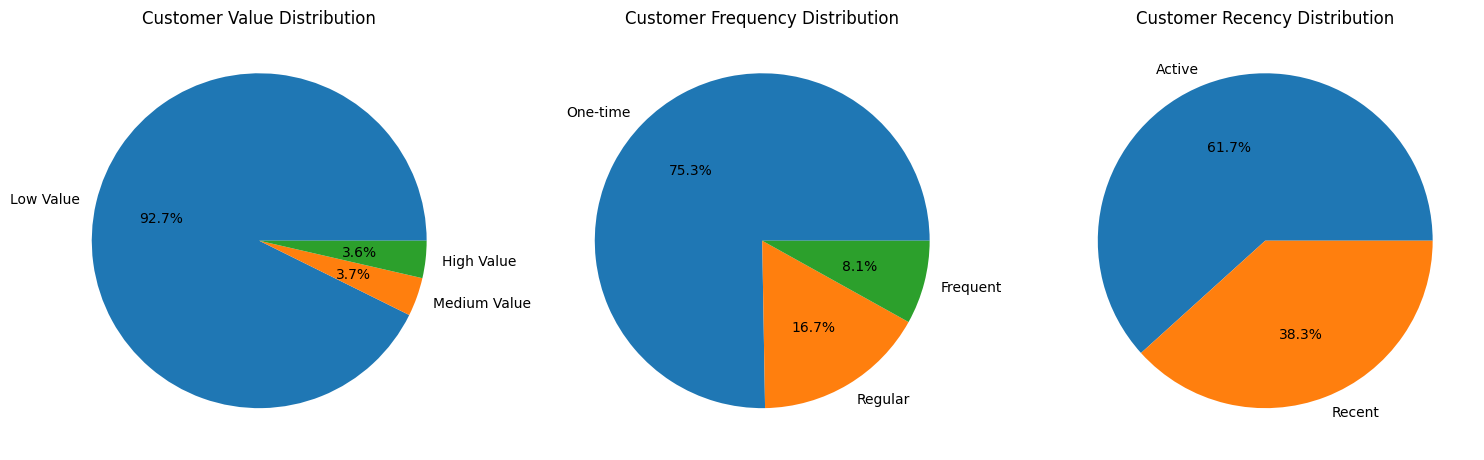

In [121]:
#  Value Segmentation Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
value_dist = customer_data['value_segment'].value_counts()
plt.pie(value_dist, labels=value_dist.index, autopct='%1.1f%%')
plt.title('Customer Value Distribution')

#  Frequency Segmentation
plt.subplot(1, 3, 2)
freq_dist = customer_data['frequency_segment'].value_counts()
plt.pie(freq_dist, labels=freq_dist.index, autopct='%1.1f%%')
plt.title('Customer Frequency Distribution')

#  Recency Segmentation
plt.subplot(1, 3, 3)
recency_dist = customer_data['recency_segment'].value_counts()
plt.pie(recency_dist, labels=recency_dist.index, autopct='%1.1f%%')
plt.title('Customer Recency Distribution')
plt.tight_layout()
plt.show()


In [122]:
# Segment Analysis
print("Value Segment Analysis:")
print("-" * 50)
value_analysis = customer_data.groupby('value_segment').agg({
    'uid': 'count',
    'total_spend': ['mean', 'sum'],
    'transaction_count': 'mean'
}).round(2)
print(value_analysis)


Value Segment Analysis:
--------------------------------------------------
                uid total_spend            transaction_count
              count        mean        sum              mean
value_segment                                               
High Value      162    18168.75  2943338.0             39.89
Low Value      4179      124.36   519712.0              1.34
Medium Value    168     3213.54   539875.0              8.60


In [123]:
print("Frequency Segment Analysis:")
print("-" * 50)
freq_analysis = customer_data.groupby('frequency_segment').agg({
    'uid': 'count',
    'total_spend': ['mean', 'sum'],
    'transaction_count': 'mean'
}).round(2)
print(freq_analysis)

Frequency Segment Analysis:
--------------------------------------------------
                    uid total_spend            transaction_count
                  count        mean        sum              mean
frequency_segment                                               
Frequent            364     9412.72  3426231.0             22.88
One-time           3394       48.60   164963.0              1.00
Regular             751      548.24   411731.0              2.39


In [124]:
#  Cross-Segment Analysis
print("Cross-Segment Analysis (Value vs Frequency):")
print("-" * 50)
cross_segment = pd.crosstab(customer_data['value_segment'], 
                           customer_data['frequency_segment'])
print(cross_segment)


Cross-Segment Analysis (Value vs Frequency):
--------------------------------------------------
frequency_segment  Frequent  One-time  Regular
value_segment                                 
High Value              158         0        4
Low Value                88      3389      702
Medium Value            118         5       45


In [126]:

# Engagement Analysis 
if 'engagement_segment' in customer_data.columns:
    print("\nEngagement Analysis:")
    print("-" * 50)
    engagement_analysis = customer_data.groupby('engagement_segment').agg({
        'uid': 'count',
        'total_spend': ['mean', 'sum'],
        'consultationCount': 'mean'
    }).round(2)
    print(engagement_analysis)


Engagement Analysis:
--------------------------------------------------
                     uid total_spend            consultationCount
                   count        mean        sum              mean
engagement_segment                                               
Highly Engaged        64     5932.91   379706.0             55.56
Low Engagement      4376      814.92  3566076.0              0.45
Moderately Engaged    69      828.16    57143.0              6.25


>### <font color="yellow">  Recommendations :

Based on the analysis, here are specific actionable recommendations:

#### Customer Retention & Reactivation:

No matter how good the product there will be users who want to leave the platform 

However if we focus on the existing users who spent more and who uses the platfore more we could have a better retention rate

Create personalized win-back campaigns for inactive customers who previously spent over ₹2000

Send special offers to customers who haven't transacted in the last 90 days

Implement an early warning system to identify customers showing declining engagement patterns

#### High-Value Customer Growth:

Platinum segment is our MVP users who uses our product regualrly and these are our loyal customers 

However the percentage users of platinum segement is low compared to other 

We need to employ strategies that could conver the existing gold to platinum users by offering ,

a free trail about what the platinum feels like and platinum users : 

Design a VIP program for customers in the 'Platinum' segment

Offer priority consultation slots for customers with high transaction frequency

Create exclusive service packages for customers with average transactions above ₹1000

#### New Customer Acquisition Strategy:

Focus marketing during months that showed highest new user acquisition

Since the data is for only two months it would be hard to make a comment on peak business months

Create starter packages priced around the average first-time purchase amount

Implement referral rewards program targeting high-value customers -- Platinum & gold especially

#### Service Enhancement:

Optimize consultation availability during peak transaction hours

Introduce tiered service levels based on customer segment analysis

Develop new service packages based on common transaction amounts

#### Pricing Optimization:

> <font color="yellow"> Total amount contributed by the users to the platform is 4002925.0 in june-july time frame


> <font color="yellow"> Average , median and Max amount contributed by the users to the platform :  296.183870	 ,   200.000000  &  5000.000000	


We could observe that even though count of exisitng , new users  is almost equal however the total amount ,

mean of amount contributed by existing users is far greater than new users this could mean new users want to test out the platform and skeptical to spend more


Introduce bundle pricing for frequently combined services

Create subscription models for regular users

Design special packages for first-time users based on successful conversion patterns

#### Engagement Improvement:

> <font color="yellow"> After spending some time i.e after a month we could see that the average transaction amount is higher for the first month of the cohort , however the retention rate is lower

> Regular users are low when compared to one time users , we need to focus on making our product as a part of their day to day life

Send targeted reminders to customers based on their typical transaction frequency

Create engagement-based rewards program

Implement milestone-based recognition system

#### Revenue Growth Initiatives:

Focus promotional activities during historically high-revenue months

Create upsell opportunities for customers showing increased engagement

Design retention offers triggered by specific customer behaviors